Dataset shape: (50000, 21)

Columns and data types:
 Transaction_ID                   object
User_ID                          object
Transaction_Amount              float64
Transaction_Type                 object
Timestamp                        object
Account_Balance                 float64
Device_Type                      object
Location                         object
Merchant_Category                object
IP_Address_Flag                 float64
Previous_Fraudulent_Activity    float64
Daily_Transaction_Count         float64
Avg_Transaction_Amount_7d       float64
Failed_Transaction_Count_7d     float64
Card_Type                        object
Card_Age                        float64
Transaction_Distance            float64
Authentication_Method            object
Risk_Score                      float64
Is_Weekend                      float64
Fraud_Label                     float64
dtype: object

Missing values:
 Transaction_ID                  1104
User_ID                          948
T

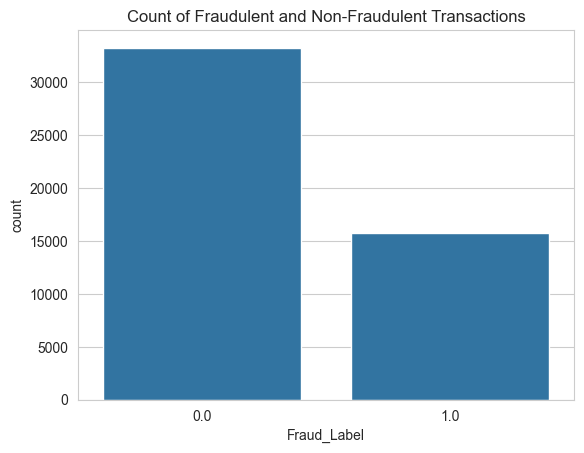

Fraudulent transactions: 32.08%
Non-fraudulent transactions: 67.92%


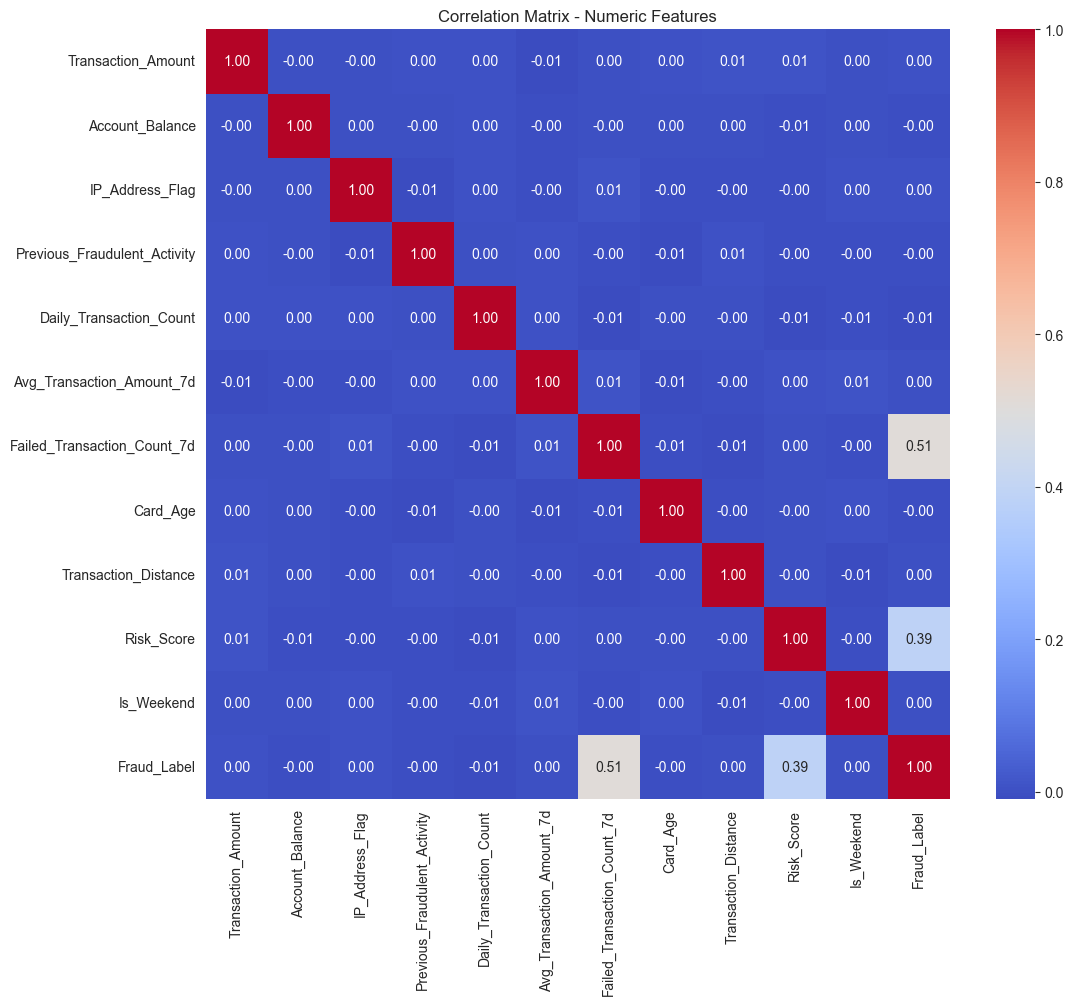

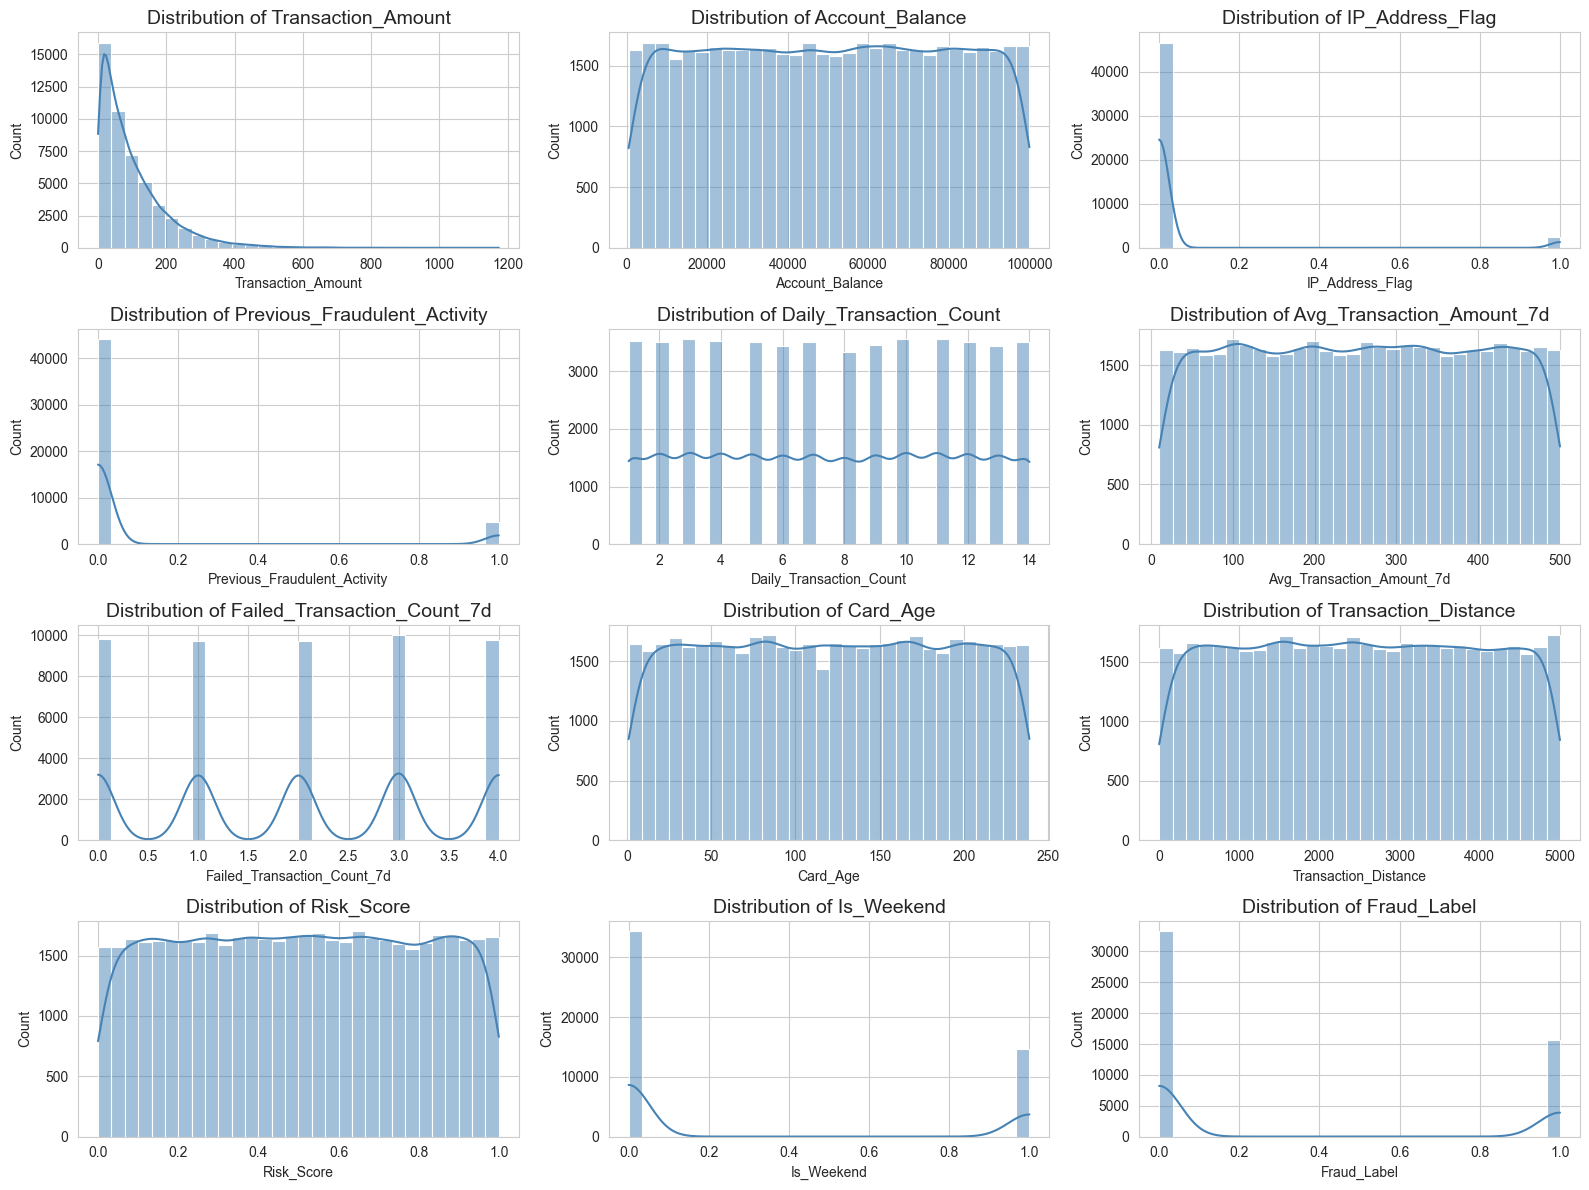

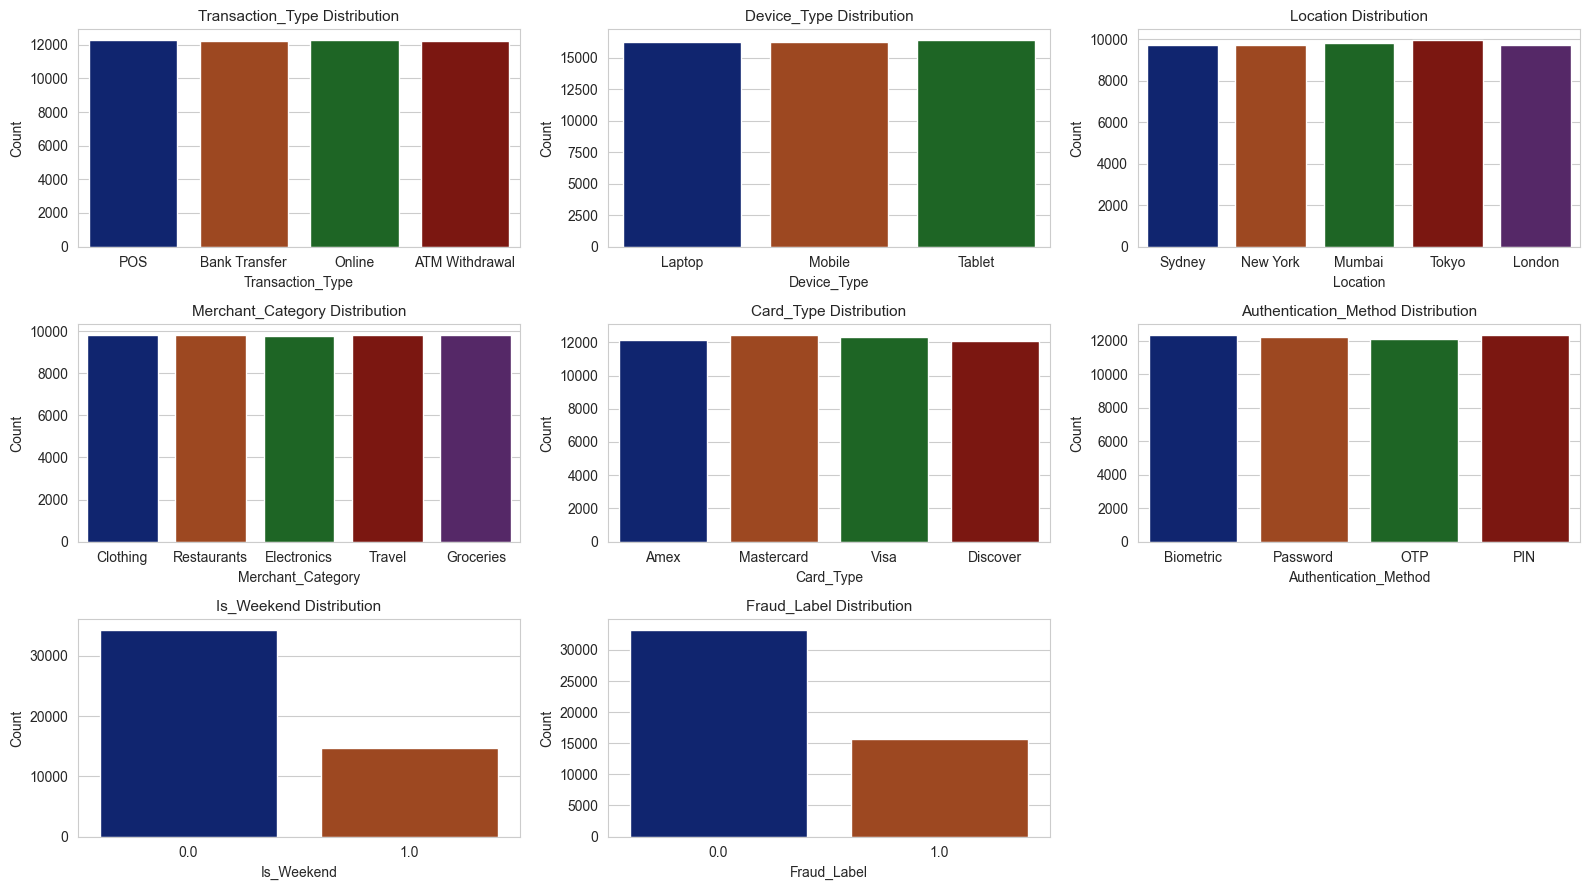

In [1]:
# notebooks/01_eda.ipynb

# -------------------------------
# 1. Import Libraries
# -------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings('ignore')


# For better visualization
%matplotlib inline
sns.set_style("whitegrid")

# -------------------------------
# 2. Load Dataset
# -------------------------------
DATA_PATH = "../data/fraud_dataset_mod.csv"
df = pd.read_csv(DATA_PATH)

# Display first 5 rows
df.head()

# -------------------------------
# 3. General Information
# -------------------------------
print("Dataset shape:", df.shape)
print("\nColumns and data types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

# -------------------------------
# 4. Numerical Descriptive Statistics
# -------------------------------
df.describe().T

# -------------------------------
# 5. Class Distribution (Fraud_Label)
# -------------------------------
sns.countplot(x='Fraud_Label', data=df)
plt.title("Count of Fraudulent and Non-Fraudulent Transactions")
plt.show()

# Percentage of fraudulent transactions
fraud_percent = df['Fraud_Label'].value_counts(normalize=True) * 100
print(f"Fraudulent transactions: {fraud_percent[1]:.2f}%")
print(f"Non-fraudulent transactions: {fraud_percent[0]:.2f}%")

# -------------------------------
# 6. Correlation Matrix for Numeric Features
# -------------------------------
numeric_cols = df.select_dtypes(include=['float64']).columns
plt.figure(figsize=(12,10))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix - Numeric Features")
plt.show()

# -------------------------------
# 7. Visualize Numeric Feature Distributions
# -------------------------------
def plot_numeric_distributions(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    n_cols = len(numeric_cols)
    cols_per_row = 3  
    n_rows = (n_cols + cols_per_row - 1) // cols_per_row
    plt.figure(figsize=(16, n_rows * (6 / 2)))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(n_rows, cols_per_row, i)
        sns.histplot(df[col], kde=True, bins=30, color='steelblue')
        plt.title(f'Distribution of {col}', fontsize=14)
        plt.xlabel(col)
        plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
plot_numeric_distributions(df)


# -------------------------------
# 8. Visualize Categorical Features
# -------------------------------
categorical_cols = [
    "Transaction_Type", "Device_Type", "Location", "Merchant_Category",
    "Card_Type", "Authentication_Method", "Is_Weekend", "Fraud_Label"]
def plot_categorical_bars(df, categorical_cols, rot=0, figsize=(16, 6)):
    n_cols = len(categorical_cols)
    cols_per_row = 3  
    n_rows = (n_cols + cols_per_row - 1) // cols_per_row
    plt.figure(figsize=(figsize[0], n_rows * (figsize[1] / 2)))
    for i, col in enumerate(categorical_cols, 1):
        plt.subplot(n_rows, cols_per_row, i)
        sns.countplot(data=df, x=col, palette='dark')
        plt.title(f'{col} Distribution', fontsize=11)
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=rot)
    plt.tight_layout()
    plt.show()
plot_categorical_bars(df, categorical_cols)


